In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from subprocess import check_output
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
%matplotlib inline

data=pd.read_csv(r'C:\Users\Amazing\Desktop\OnlineNewsPopularity.csv',encoding='gbk')

In [2]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
data.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [4]:
for field in data.columns :
    print('field %s : num 0-entries: %d' % (field, len(data.loc[ data[field] == 0, field ])))

field url : num 0-entries: 0
field  timedelta : num 0-entries: 0
field  n_tokens_title : num 0-entries: 0
field  n_tokens_content : num 0-entries: 1181
field  n_unique_tokens : num 0-entries: 1181
field  n_non_stop_words : num 0-entries: 1181
field  n_non_stop_unique_tokens : num 0-entries: 1181
field  num_hrefs : num 0-entries: 1299
field  num_self_hrefs : num 0-entries: 5350
field  num_imgs : num 0-entries: 6987
field  num_videos : num 0-entries: 25026
field  average_token_length : num 0-entries: 1181
field  num_keywords : num 0-entries: 0
field  data_channel_is_lifestyle : num 0-entries: 37545
field  data_channel_is_entertainment : num 0-entries: 32587
field  data_channel_is_bus : num 0-entries: 33386
field  data_channel_is_socmed : num 0-entries: 37321
field  data_channel_is_tech : num 0-entries: 32298
field  data_channel_is_world : num 0-entries: 31217
field  kw_min_min : num 0-entries: 79
field  kw_max_min : num 0-entries: 819
field  kw_avg_min : num 0-entries: 81
field  kw_min_m

<font size=5>基本EDA分析（Exploratory Data Analysis,EDA）</font>

In [5]:
sns.countplot(x='shares',data=data)
plt.show()

ValueError: Could not interpret input 'shares'

In [ ]:
columns=data.columns[:60]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(5,4,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [ ]:
corrmat= data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, square=True, annot= True)

In [ ]:
data.plot(kind= 'box' , subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(12,10))

<font size=5>异常值处理</font>

In [3]:
data_new=data

In [4]:
data_new.columns

Index(['Quality Assessment', 'Pre-screening', 'MA detection(alpha = 0.5)',
       'MA detection(alpha = 0.6)', 'MA detection(alpha = 0.7)',
       'MA detection(alpha = 0.8)', 'MA detection(alpha = 0.9)',
       'MA detection(alpha = 1)', 'ROI1', 'ROI2', 'ROI3', 'ROI4', 'ROI5',
       'ROI6', 'ROI7', 'ROI8', 'Euclidean Distance ',
       'diameter of the optic disc', 'AM/FM', 'Class'],
      dtype='object')

In [5]:
data_new.drop('ROI6',axis=1,inplace=True)
data_new.drop('ROI7',axis=1,inplace=True)
data_new.drop('ROI8',axis=1,inplace=True)

In [6]:
max_ROI4 = data_new.ROI4.max()
data_new = data_new[data_new.ROI4!=max_ROI4]
max_ROI5 = data_new.ROI5.max()
data_new = data_new[data_new.ROI5!=max_ROI5]

In [7]:
def replace_zero(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    data_new.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    data_new.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

for col in ['ROI2', 'ROI3', 'ROI4','ROI5']:   
    replace_zero(data_new, col, 'Class')   

<font size=5>预测模型</font>

In [8]:
data_new['fusion']=(data_new['MA detection(alpha = 0.7)']+data_new['MA detection(alpha = 0.8)']+data_new['MA detection(alpha = 0.9)'])/3
data_new.drop('MA detection(alpha = 0.7)',axis=1,inplace=True)
data_new.drop('MA detection(alpha = 0.8)',axis=1,inplace=True)
data_new.drop('MA detection(alpha = 0.9)',axis=1,inplace=True)
data_new.drop('Quality Assessment',axis=1,inplace=True)
data_new.drop('Pre-screening',axis=1,inplace=True)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new.drop('Class',axis=1), 
                                                    data_new['Class'], test_size=0.4, 
                                                    random_state=123)

In [42]:
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(data.drop('Class',axis=1), 
                                                    data['Class'], test_size=0.4, 
                                                    random_state=123)

In [10]:
#Feature Scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

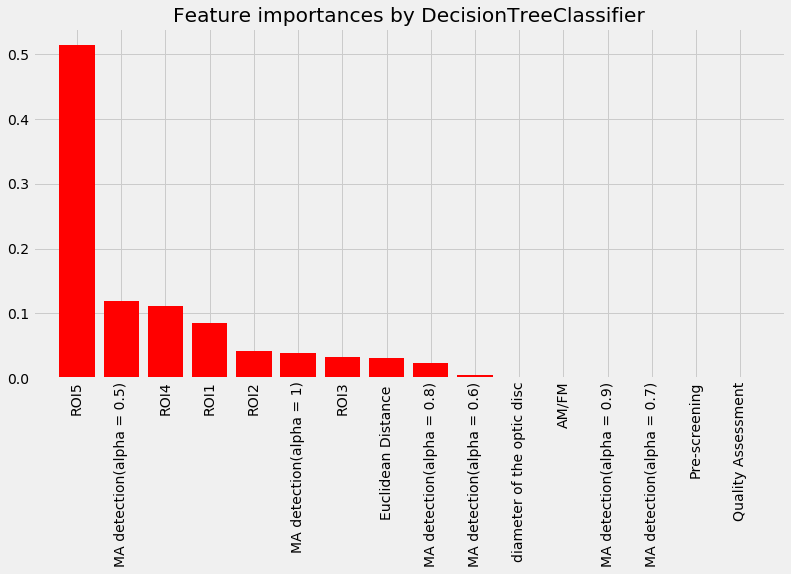

In [12]:
#Feature importance
#decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits

dtree = tree.DecisionTreeClassifier(
    max_depth=6
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = data_new.drop(['Class'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='red',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

<font size=5>决策树模型</font>

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

dtree1 = DecisionTreeClassifier(random_state=0)
dtree1.fit(X_train, y_train)
print(classification_report(y_test, dtree1.predict(X_test)))
print(confusion_matrix(y_test, dtree1.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, dtree1.predict(X_train)))
print ("Decision Tree accuracy is %3.3f" % accuracy_score(y_test, dtree1.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.71      0.72      0.71       211
          1       0.76      0.76      0.76       249

avg / total       0.74      0.74      0.74       460

[[151  60]
 [ 61 188]]
Traininf accuracy is 1.000
Decision Tree accuracy is 0.737


In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

dtree2 = DecisionTreeClassifier(max_depth=6,criterion='gini',random_state=0)
dtree2.fit(X_train, y_train)
print(classification_report(y_test, dtree2.predict(X_test)))
print(confusion_matrix(y_test, dtree2.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, dtree2.predict(X_train)))
print ("Decision Tree accuracy is %3.3f" % accuracy_score(y_test, dtree2.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.71      0.81      0.75       211
          1       0.81      0.72      0.76       249

avg / total       0.77      0.76      0.76       460

[[170  41]
 [ 70 179]]
Traininf accuracy is 0.878
Decision Tree accuracy is 0.759


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

dtree3 = DecisionTreeClassifier(max_depth=6,criterion='gini',random_state=0)
dtree3.fit(X_train_old, y_train_old)
print(classification_report(y_test_old, dtree3.predict(X_test_old)))
print(confusion_matrix(y_test_old, dtree3.predict(X_test_old)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train_old, dtree3.predict(X_train_old)))
print ("Decision Tree accuracy is %3.3f" % accuracy_score(y_test_old, dtree3.predict(X_test_old) ))

             precision    recall  f1-score   support

          0       0.57      0.82      0.67       206
          1       0.77      0.49      0.60       255

avg / total       0.68      0.64      0.63       461

[[169  37]
 [129 126]]
Traininf accuracy is 0.767
Decision Tree accuracy is 0.640


<font size=5>随机森林模型</font>

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    max_depth=6,
    n_estimators=100,
    random_state=100,
    criterion='gini'
    )

In [48]:
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, rf.predict(X_train)))
print ("Random Forest is %3.3f" % accuracy_score(y_test, rf.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.69      0.89      0.78       211
          1       0.87      0.67      0.76       249

avg / total       0.79      0.77      0.77       460

[[187  24]
 [ 83 166]]
Traininf accuracy is 0.890
Random Forest is 0.767


In [49]:
rf.fit(X_train_old, y_train_old)
print(classification_report(y_test_old, rf.predict(X_test_old)))
print(confusion_matrix(y_test_old, rf.predict(X_test_old)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train_old, rf.predict(X_train_old)))
print ("Random Forest accuracy is %3.3f" % accuracy_score(y_test_old, rf.predict(X_test_old) ))

             precision    recall  f1-score   support

          0       0.56      0.84      0.67       206
          1       0.79      0.47      0.59       255

avg / total       0.69      0.64      0.63       461

[[173  33]
 [134 121]]
Traininf accuracy is 0.839
Random Forest accuracy is 0.638


<font size=5>Adaboost模型</font>

In [50]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=6),n_estimators=100,random_state=100)

In [51]:
ada.fit(X_train, y_train)
print(classification_report(y_test, ada.predict(X_test)))
confusion_matrix(y_test, ada.predict(X_test))
print(confusion_matrix(y_test, ada.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, ada.predict(X_train)))
print ("ADA boost is %3.3f" % accuracy_score(y_test, ada.predict(X_test)))

             precision    recall  f1-score   support

          0       0.73      0.81      0.77       211
          1       0.82      0.74      0.78       249

avg / total       0.78      0.77      0.77       460

[[171  40]
 [ 64 185]]
Traininf accuracy is 1.000
ADA boost is 0.774


In [52]:
ada.fit(X_train_old, y_train_old)
print(classification_report(y_test_old, ada.predict(X_test_old)))
print(confusion_matrix(y_test_old, ada.predict(X_test_old)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train_old, ada.predict(X_train_old)))
print ("Random Forest accuracy is %3.3f" % accuracy_score(y_test_old, ada.predict(X_test_old) ))

             precision    recall  f1-score   support

          0       0.61      0.78      0.68       206
          1       0.77      0.59      0.67       255

avg / total       0.69      0.67      0.67       461

[[160  46]
 [104 151]]
Traininf accuracy is 1.000
Random Forest accuracy is 0.675


<font size=5>GBDT模型</font>

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(max_depth=6,n_estimators=100,learning_rate=0.1,random_state=100)

In [54]:
gbc.fit(X_train, y_train)
print(classification_report(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, gbc.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, gbc.predict(X_train)))
print ("GBC accuracy is %3.3f" % accuracy_score(y_test, gbc.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.74      0.78      0.76       211
          1       0.80      0.76      0.78       249

avg / total       0.77      0.77      0.77       460

[[164  47]
 [ 59 190]]
Traininf accuracy is 1.000
GBC accuracy is 0.770


In [55]:
gbc.fit(X_train_old, y_train_old)
print(classification_report(y_test_old, gbc.predict(X_test_old)))
print(confusion_matrix(y_test_old, gbc.predict(X_test_old)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train_old, gbc.predict(X_train_old)))
print ("Random Forest accuracy is %3.3f" % accuracy_score(y_test_old,gbc.predict(X_test_old) ))

             precision    recall  f1-score   support

          0       0.61      0.74      0.67       206
          1       0.74      0.62      0.67       255

avg / total       0.68      0.67      0.67       461

[[152  54]
 [ 98 157]]
Traininf accuracy is 1.000
Random Forest accuracy is 0.670


<font size=5>参数寻优</font>

In [34]:
from sklearn.grid_search import GridSearchCV

C:\Users\Taylor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Taylor\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [35]:
gbm2= GradientBoostingClassifier(learning_rate=0.1,
                                 n_estimators=220,
                                 max_depth=7,
                                 min_samples_leaf =40,
                                 #min_samples_split =300,
                                 max_features=10,
                                 subsample=0.8,
                                 random_state=100)  
gbm2.fit(X_train, y_train)
print(classification_report(y_test, gbm2.predict(X_test)))
print(confusion_matrix(y_test, gbm2.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, gbm2.predict(X_train)))
print ("Random Forest accuracy is %3.3f" % accuracy_score(y_test,gbm2.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.77      0.78      0.78       114
          1       0.78      0.78      0.78       116

avg / total       0.78      0.78      0.78       230

[[89 25]
 [26 90]]
Traininf accuracy is 1.000
Random Forest accuracy is 0.778


In [27]:
param_test1 = {'n_estimators':list(range(100,401,20))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=100,min_samples_leaf=20,max_features='sqrt', subsample=0.8,random_state=10), param_grid = param_test1, scoring='accuracy',iid=False,cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77910, std: 0.02478, params: {'n_estimators': 100},
  mean: 0.77911, std: 0.01963, params: {'n_estimators': 120},
  mean: 0.79106, std: 0.02411, params: {'n_estimators': 140},
  mean: 0.79106, std: 0.03025, params: {'n_estimators': 160},
  mean: 0.78997, std: 0.02806, params: {'n_estimators': 180},
  mean: 0.78999, std: 0.02976, params: {'n_estimators': 200},
  mean: 0.78999, std: 0.02677, params: {'n_estimators': 220},
  mean: 0.78782, std: 0.02456, params: {'n_estimators': 240},
  mean: 0.79326, std: 0.02456, params: {'n_estimators': 260},
  mean: 0.78457, std: 0.03610, params: {'n_estimators': 280},
  mean: 0.79000, std: 0.03009, params: {'n_estimators': 300},
  mean: 0.79547, std: 0.03272, params: {'n_estimators': 320},
  mean: 0.79329, std: 0.03872, params: {'n_estimators': 340},
  mean: 0.79003, std: 0.03271, params: {'n_estimators': 360},
  mean: 0.78679, std: 0.04059, params: {'n_estimators': 380},
  mean: 0.78897, std: 0.03751, params: {'n_estimators': 400}],
 {'n_es

In [28]:
param_test2= {'max_depth':list(range(3,12,1)), 'min_samples_split':list(range(101,400,100))}  
gsearch2= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                              n_estimators=320,
                                                              min_samples_leaf=20,
                                                              max_features='sqrt',
                                                              subsample=0.8,
                                                              random_state=10),param_grid= param_test2,scoring='accuracy',iid=False,cv=5)  
gsearch2.fit(X_train,y_train)  
gsearch2.grid_scores_,gsearch2.best_params_, gsearch2.best_score_ 

([mean: 0.79434, std: 0.02749, params: {'max_depth': 3, 'min_samples_split': 101},
  mean: 0.79216, std: 0.01711, params: {'max_depth': 3, 'min_samples_split': 201},
  mean: 0.79540, std: 0.03315, params: {'max_depth': 3, 'min_samples_split': 301},
  mean: 0.80634, std: 0.02575, params: {'max_depth': 4, 'min_samples_split': 101},
  mean: 0.79109, std: 0.02601, params: {'max_depth': 4, 'min_samples_split': 201},
  mean: 0.80083, std: 0.02410, params: {'max_depth': 4, 'min_samples_split': 301},
  mean: 0.79762, std: 0.03214, params: {'max_depth': 5, 'min_samples_split': 101},
  mean: 0.80086, std: 0.02289, params: {'max_depth': 5, 'min_samples_split': 201},
  mean: 0.79105, std: 0.01965, params: {'max_depth': 5, 'min_samples_split': 301},
  mean: 0.80635, std: 0.03848, params: {'max_depth': 6, 'min_samples_split': 101},
  mean: 0.79762, std: 0.03106, params: {'max_depth': 6, 'min_samples_split': 201},
  mean: 0.79435, std: 0.02474, params: {'max_depth': 6, 'min_samples_split': 301},
  me

In [29]:
param_test3= {'min_samples_split':list(range(100,400,100)),'min_samples_leaf':list(range(20,100,10))}  
gsearch3= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                              n_estimators=320,
                                                              max_depth=6,
                                                              max_features='sqrt',
                                                              subsample=0.8,
                                                              random_state=10),param_grid= param_test3,scoring='accuracy',iid=False, cv=5)  
gsearch3.fit(X_train,y_train)  
gsearch3.grid_scores_,gsearch3.best_params_, gsearch3.best_score_

([mean: 0.80526, std: 0.02693, params: {'min_samples_leaf': 20, 'min_samples_split': 100},
  mean: 0.79983, std: 0.03077, params: {'min_samples_leaf': 20, 'min_samples_split': 200},
  mean: 0.78890, std: 0.02133, params: {'min_samples_leaf': 20, 'min_samples_split': 300},
  mean: 0.79657, std: 0.03655, params: {'min_samples_leaf': 30, 'min_samples_split': 100},
  mean: 0.80527, std: 0.02882, params: {'min_samples_leaf': 30, 'min_samples_split': 200},
  mean: 0.79544, std: 0.02483, params: {'min_samples_leaf': 30, 'min_samples_split': 300},
  mean: 0.80418, std: 0.02741, params: {'min_samples_leaf': 40, 'min_samples_split': 100},
  mean: 0.80527, std: 0.02274, params: {'min_samples_leaf': 40, 'min_samples_split': 200},
  mean: 0.80091, std: 0.02460, params: {'min_samples_leaf': 40, 'min_samples_split': 300},
  mean: 0.79767, std: 0.02644, params: {'min_samples_leaf': 50, 'min_samples_split': 100},
  mean: 0.79879, std: 0.02694, params: {'min_samples_leaf': 50, 'min_samples_split': 200},

In [30]:
param_test4= {'max_features':list(range(1,12,1))}  
gsearch4= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                              n_estimators=320,
                                                              max_depth=6, 
                                                              min_samples_leaf =60,
                                                              min_samples_split =100,
                                                              subsample=0.8,
                                                              random_state=100),param_grid= param_test4,scoring='accuracy',iid=False,cv=5)  
gsearch4.fit(X_train,y_train)  
gsearch4.grid_scores_,gsearch4.best_params_, gsearch4.best_score_ 

([mean: 0.79983, std: 0.03744, params: {'max_features': 1},
  mean: 0.79987, std: 0.03619, params: {'max_features': 2},
  mean: 0.80206, std: 0.03877, params: {'max_features': 3},
  mean: 0.80532, std: 0.04269, params: {'max_features': 4},
  mean: 0.79883, std: 0.04542, params: {'max_features': 5},
  mean: 0.80533, std: 0.04096, params: {'max_features': 6},
  mean: 0.80532, std: 0.03730, params: {'max_features': 7},
  mean: 0.79988, std: 0.03699, params: {'max_features': 8},
  mean: 0.81077, std: 0.03174, params: {'max_features': 9},
  mean: 0.80209, std: 0.04471, params: {'max_features': 10},
  mean: 0.81078, std: 0.04527, params: {'max_features': 11}],
 {'max_features': 11},
 0.8107833278752736)

In [31]:
param_test5= {'subsample':[0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]}  
gsearch5= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                              n_estimators=320,
                                                              max_depth=6,
                                                              min_samples_leaf =60,
                                                              min_samples_split =100,
                                                              max_features=11,
                                                              random_state=100),param_grid= param_test5,scoring='accuracy', iid=False, cv=5)  
gsearch5.fit(X_train,y_train)  
gsearch5.grid_scores_,gsearch5.best_params_, gsearch5.best_score_

([mean: 0.79561, std: 0.04709, params: {'subsample': 0.45},
  mean: 0.80646, std: 0.03833, params: {'subsample': 0.5},
  mean: 0.80316, std: 0.03465, params: {'subsample': 0.55},
  mean: 0.81622, std: 0.03749, params: {'subsample': 0.6},
  mean: 0.79445, std: 0.03468, params: {'subsample': 0.65},
  mean: 0.81510, std: 0.02630, params: {'subsample': 0.7},
  mean: 0.80207, std: 0.03827, params: {'subsample': 0.75},
  mean: 0.81078, std: 0.04527, params: {'subsample': 0.8}],
 {'subsample': 0.6},
 0.8162243711994247)

In [32]:
gbm2= GradientBoostingClassifier(learning_rate=0.1,
                                 n_estimators=320,
                                 max_depth=6,
                                 min_samples_leaf =60,
                                 min_samples_split =100,
                                 max_features=11,
                                 subsample=0.6,
                                 random_state=100
                                 )  
gbm2.fit(X_train,y_train)  
print(classification_report(y_test, gbm2.predict(X_test)))
print(confusion_matrix(y_test, gbm2.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, gbm2.predict(X_train)))
print ("Random Forest accuracy is %3.3f" % accuracy_score(y_test,gbm2.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.77      0.81      0.79       165
          1       0.81      0.78      0.80       180

avg / total       0.79      0.79      0.79       345

[[133  32]
 [ 40 140]]
Traininf accuracy is 1.000
Random Forest accuracy is 0.791


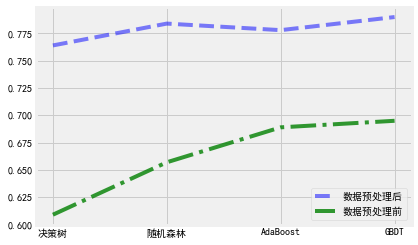

In [4]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
group_label = ['决策树','随机森林','AdaBoost','GBDT']
y1=[0.764,0.784,0.778,0.79]
y2=[0.609,0.657,0.689,0.695]
x=[1,2,3,4]
plt.plot(x,y1,ls='--',lw=4,c='b',alpha=0.5,label=u'数据预处理后')
plt.plot(x,y2,ls='-.',lw=4,c='g',alpha=0.8,label=u'数据预处理前')
plt.xticks(x, group_label, rotation=0)  
plt.legend()
plt.show()